In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Array of Trains
delayed_trains = {}
    
# Target User
target_user = "SubwayStats"

# Loop through 50 pages of 
for x in range(50):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"].lower().split(" ")
        
        # Print the tweet and date if it contains the word: "delays" or "change"
        if("delays" in tweet_text or "change" in tweet_text):
            print(tweet["text"].lower())
            
            # Loop through hashtags to extract the train names
            for hashtag in tweet["entities"]["hashtags"]:
                
                train_name = hashtag["text"].lower()
                
                # Remove all hashtags that are extraneous
                if (train_name != "nycsubway" and train_name != "mta" and train_name != "nyc"):
                                        
                    # If train is new, add it the list...
                    if(train_name not in delayed_trains):
                        delayed_trains[train_name] = 1
                    
                    # If it already exists add 1 to its count
                    else:    
                        delayed_trains[train_name] += 1 

delays on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change  #mta https://t.co/jh4u3ctg8s
service change reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#gtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
delays reported on #ltrain  #mta https://t.co/jh4u3ctg8s
#ltrain have service change  #nyc https://t.co/jh4u3ctg8s
service change reported on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
#4train #5train and #6train have delays  #nyc https://t.co/jh4u3ctg8s
delays on #ltrain  #mta https://t.co/jh4u3ctg8s
delays on #ntrain #qtrain #rtrain #wtrain  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have delays  #nycsubway https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have service change  #mta https://t.co/

In [3]:
# Print the Train Delay counts
print(delayed_trains)

# Convert Train Delay object into a series
delayed_trains_pd = pd.Series(delayed_trains)

# Preview the results
delayed_trains_pd

{'ntrain': 115, 'qtrain': 115, 'rtrain': 115, 'wtrain': 115, 'btrain': 146, 'dtrain': 146, 'ftrain': 146, 'mtrain': 146, 'gtrain': 15, 'ltrain': 21, '4train': 81, '5train': 81, '6train': 81, 'atrain': 107, 'ctrain': 107, 'etrain': 107, '1train': 100, '2train': 100, '3train': 100, '7train': 38, 'jtrain': 21, 'ztrain': 21, 'sirtrain': 4, 'strain': 3}


1train      100
2train      100
3train      100
4train       81
5train       81
6train       81
7train       38
atrain      107
btrain      146
ctrain      107
dtrain      146
etrain      107
ftrain      146
gtrain       15
jtrain       21
ltrain       21
mtrain      146
ntrain      115
qtrain      115
rtrain      115
sirtrain      4
strain        3
wtrain      115
ztrain       21
dtype: int64

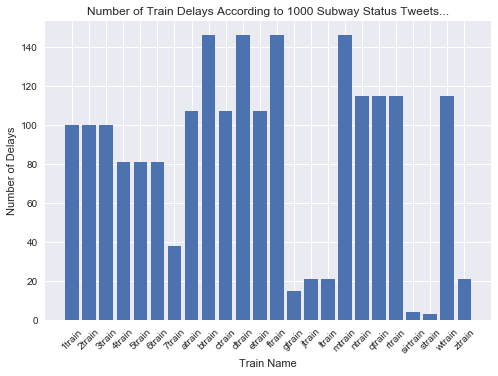

In [6]:
# Create a plot  
len(delayed_trains_pd.index)
plt.bar(range(len(delayed_trains_pd.index)), delayed_trains_pd.values)
plt.xticks(range(len(delayed_trains_pd.index)), delayed_trains_pd.index, rotation=45)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of Train Delays According to 1000 Subway Status Tweets...")
plt.show()